In [1]:
from utils.dataset import load_dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = load_dataset("Chinatown", "TRAIN")
ts_data = data.iloc[:,1:]
ts_data = ts_data.to_numpy()
scaler = MinMaxScaler()
ts_data = scaler.fit_transform(ts_data)
org_data_shape = ts_data.shape
N  = org_data_shape[0]
T = org_data_shape[1]

ts_data = ts_data.reshape(N, T, 1)


In [2]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
data = load_dataset("Chinatown", "TRAIN")

# Suppose labels is a 1D array of length N
labels = data.iloc[:, 0].to_numpy()  # shape (N,)

# Initialize encoder (dense output for simplicity)
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform (input must be 2D)
labels_oh = enc.fit_transform(labels.reshape(-1, 1))  # shape (N, n_classes)
labels_oh = labels_oh.reshape(N, 1, 2)

labels_oh = np.tile(labels_oh, (1, T,1))
# labels_oh  # shape (N, n_classes)

In [3]:
all_data = np.concatenate([ts_data, labels_oh],axis=-1)
all_data.shape


(20, 24, 3)

In [4]:
import tsgm


tsc = tsgm.models.timeGAN.TimeGAN(T, n_features=3)

In [5]:
tsc.fit(all_data, epochs=1000, batch_size=10)


Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RealData (InputLayer)       [(256, 24, 3)]            0         
                                                                 
 Embedder (Sequential)       (256, 24, 24)             9888      
                                                                 
 Recovery (Sequential)       (256, 24, 3)              10875     
                                                                 
Total params: 20763 (81.11 KB)
Trainable params: 20763 (81.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "AdversarialSupervised"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RandomNoise (InputLayer)    [(256, 24, 3)]            0         
                                                      

INFO:models:Start Embedding Network Training
Autoencoder - training:  62%|██████▏   | 620/1000 [00:06<00:04, 90.64it/s] 


KeyboardInterrupt: 

In [84]:
samples = 100
gen_data = tsc.generate(samples)
#gen_data = scaler.inverse_transform(gen_data)

Synthetic data generation: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


In [85]:
a,b,c= np.split(gen_data, indices_or_sections=3, axis=2)
a = a.reshape(samples,T)
a = scaler.inverse_transform(a)


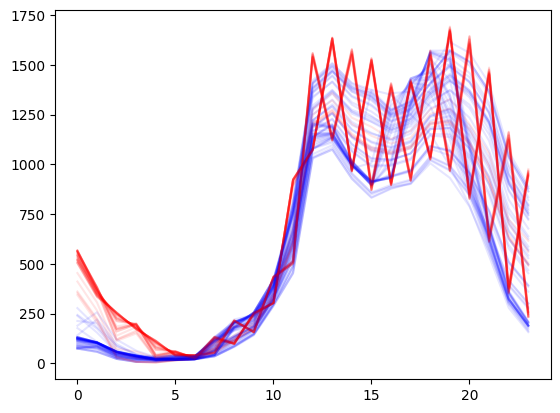

In [86]:
from matplotlib import pyplot as plt

for ts,class_0,class_1 in zip(a,b,c):
    class_0 = sum(class_0)
    class_1 = sum(class_1)
    plt.plot(ts, alpha=0.1, color="red" if class_0 > class_1 else "blue")


In [87]:
b


array([[[3.5992087e-04],
        [2.0624268e-05],
        [5.6297899e-06],
        ...,
        [2.3873506e-06],
        [3.3661875e-06],
        [5.1272605e-06]],

       [[3.6403802e-04],
        [2.1563872e-05],
        [5.6365593e-06],
        ...,
        [1.9279455e-06],
        [2.5412025e-06],
        [3.2601577e-06]],

       [[3.1010012e-04],
        [6.0046557e-05],
        [5.2390478e-05],
        ...,
        [1.8468517e-06],
        [1.7895264e-06],
        [1.7384596e-06]],

       ...,

       [[9.9977624e-01],
        [9.9998248e-01],
        [9.9999207e-01],
        ...,
        [9.9999303e-01],
        [9.9999446e-01],
        [9.9999315e-01]],

       [[3.5851728e-04],
        [2.0403344e-05],
        [6.3927750e-06],
        ...,
        [7.2133719e-07],
        [7.1674827e-07],
        [7.1243443e-07]],

       [[3.6652805e-04],
        [2.2253291e-05],
        [5.6495178e-06],
        ...,
        [1.6021539e-06],
        [2.0330542e-06],
        [2.5622719e-06]]

In [88]:
c

array([[[9.9952602e-01],
        [9.9998146e-01],
        [9.9999511e-01],
        ...,
        [9.9999762e-01],
        [9.9999684e-01],
        [9.9999565e-01]],

       [[9.9952012e-01],
        [9.9998057e-01],
        [9.9999505e-01],
        ...,
        [9.9999797e-01],
        [9.9999750e-01],
        [9.9999696e-01]],

       [[9.9958199e-01],
        [9.9995464e-01],
        [9.9996364e-01],
        ...,
        [9.9999821e-01],
        [9.9999827e-01],
        [9.9999827e-01]],

       ...,

       [[1.9447815e-04],
        [1.7786946e-05],
        [8.6648679e-06],
        ...,
        [7.4508234e-06],
        [7.4467039e-06],
        [7.3462379e-06]],

       [[9.9952787e-01],
        [9.9998170e-01],
        [9.9999452e-01],
        ...,
        [9.9999917e-01],
        [9.9999917e-01],
        [9.9999917e-01]],

       [[9.9951595e-01],
        [9.9997991e-01],
        [9.9999499e-01],
        ...,
        [9.9999821e-01],
        [9.9999785e-01],
        [9.9999750e-01]]